# HANDWRITTEN POLYNOMIAL EQUATION SOLVER USING CNN

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import cv2
import glob
import matplotlib.pyplot as plt

## To randomize the image dataset, initilialize seed()

In [2]:
seed = 10
np.random.seed(seed)

## Upload images from the system

In [3]:
#Input Images
PATH = 'C:\\Users\\laksh\\Documents\\VIT\\3rd Year\\ML\\Project'
trainImg = sorted(glob.glob(f"{PATH}\\trainfinal\\*"))
testImg= sorted(glob.glob(f"{PATH}\\testfinal\\*"))
eqImg=sorted(glob.glob(f"{PATH}\\eqfinal\\*"))

## Read and display images

In [4]:
def Image_read(image):
    x = cv2.imread(image)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    return x

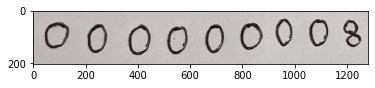

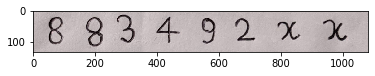

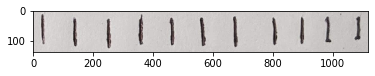

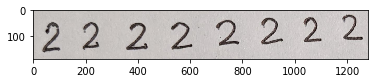

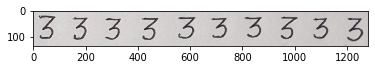

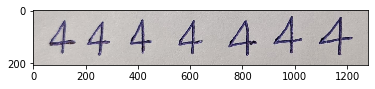

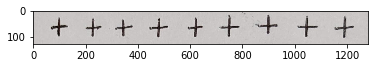

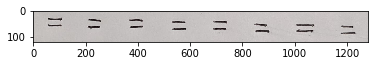

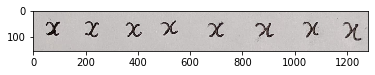

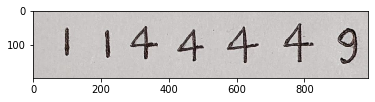

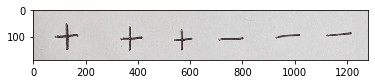

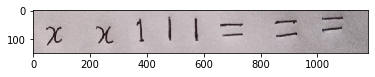

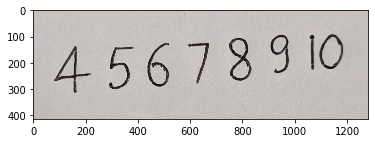

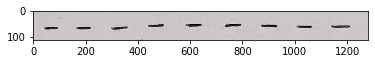

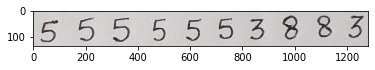

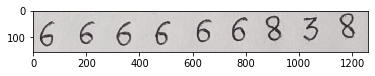

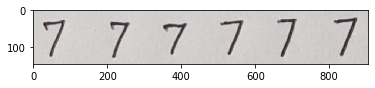

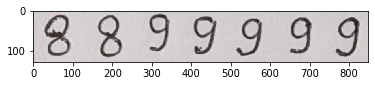

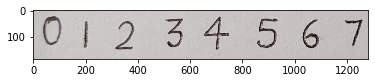

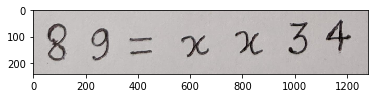

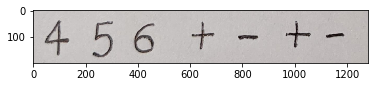

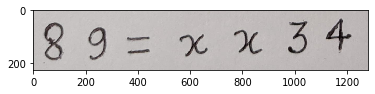

In [5]:
#Show training images
for images in trainImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

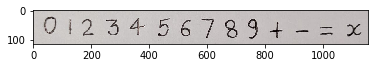

In [6]:
#Show test images
for images in testImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

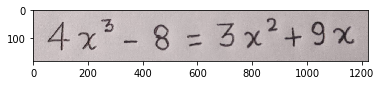

In [7]:
#Show equation image
for images in eqImg:
    image = Image_read(images)
    plt.imshow(image)
    plt.show()

## The cells below preprocess the image and store them with padding and without padding in different lists

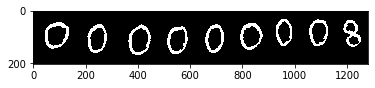

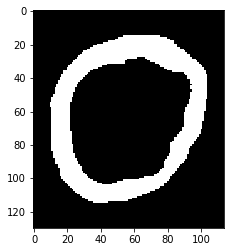

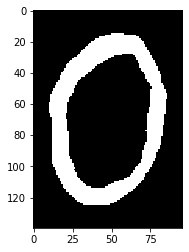

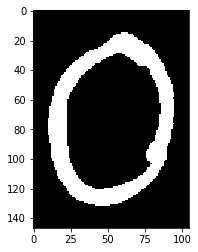

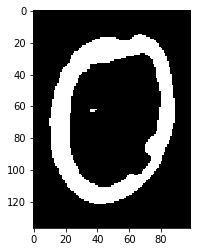

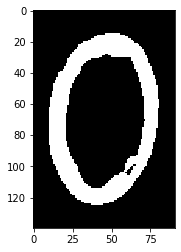

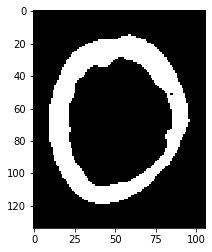

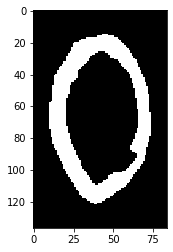

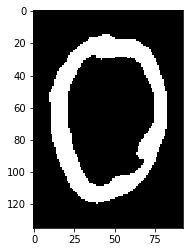

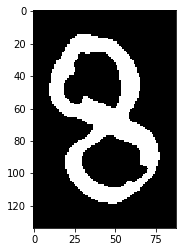

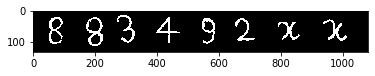

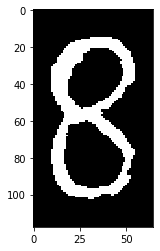

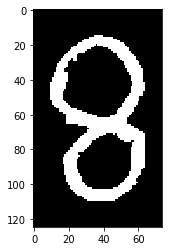

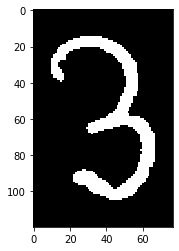

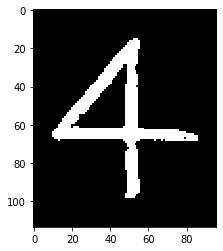

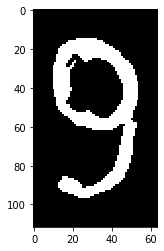

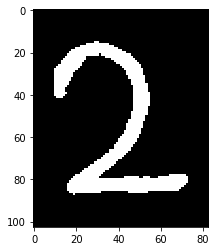

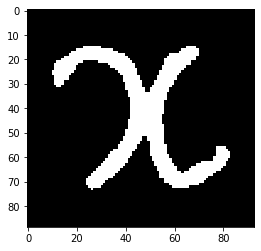

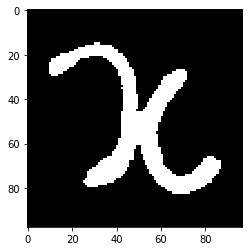

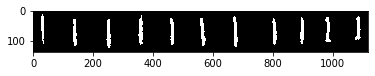

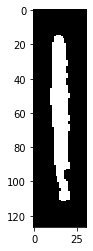

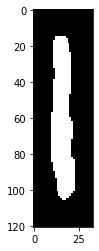

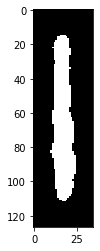

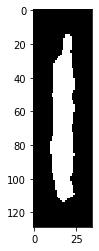

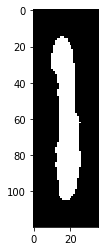

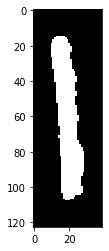

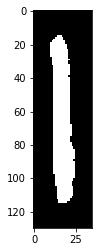

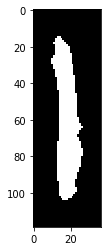

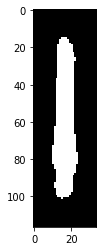

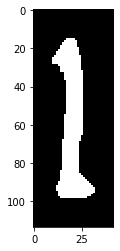

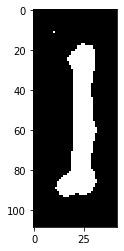

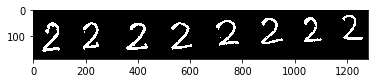

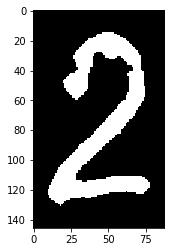

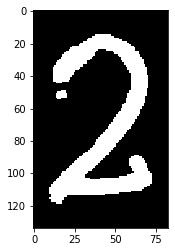

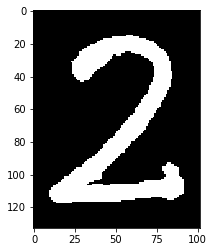

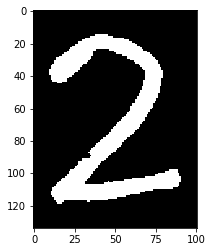

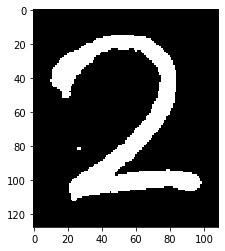

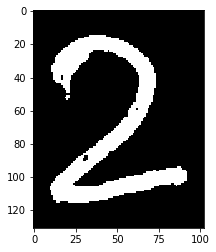

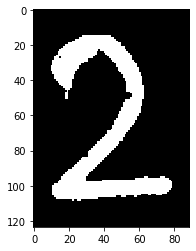

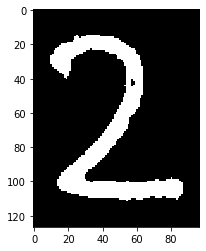

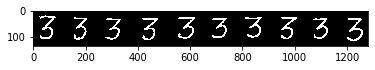

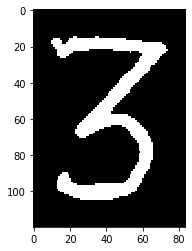

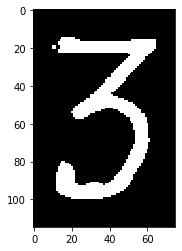

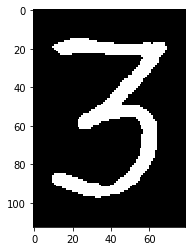

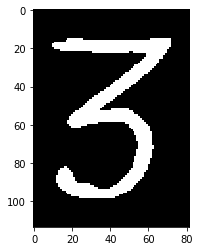

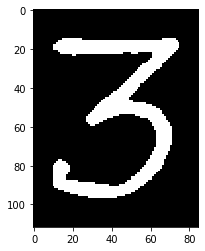

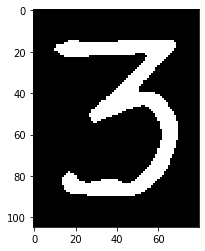

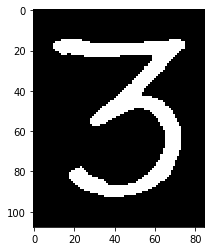

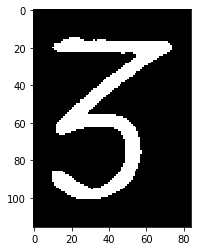

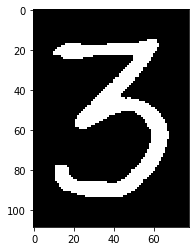

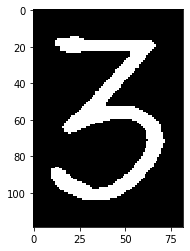

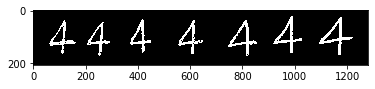

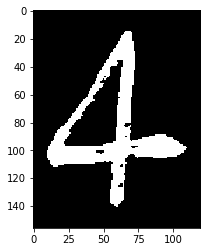

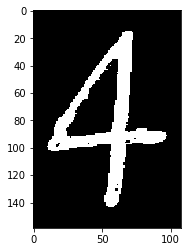

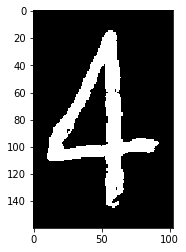

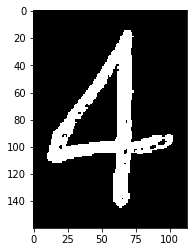

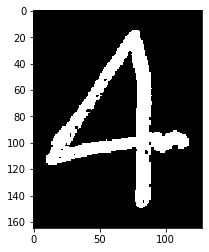

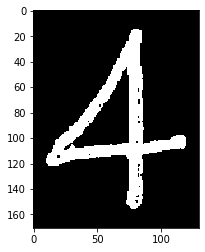

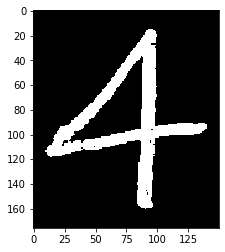

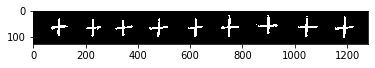

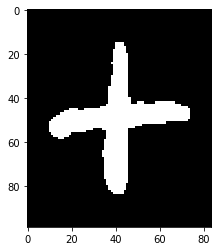

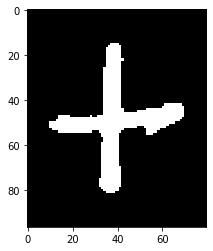

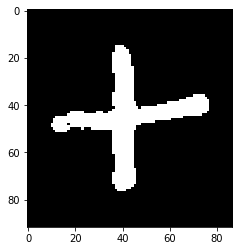

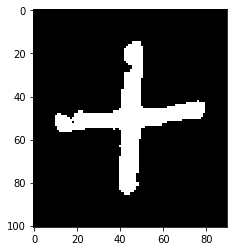

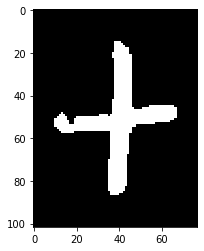

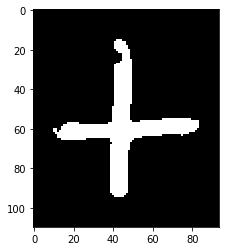

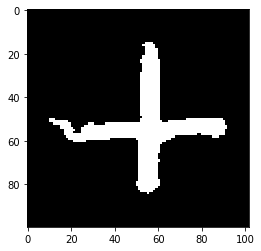

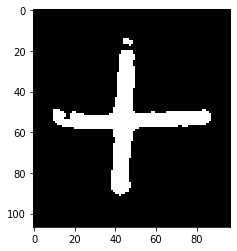

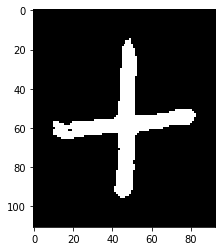

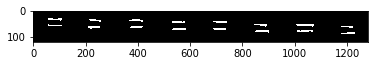

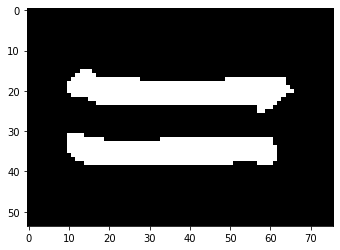

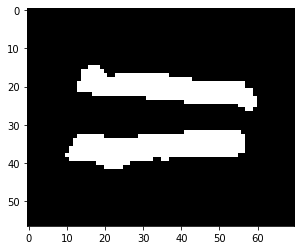

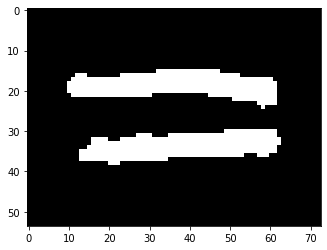

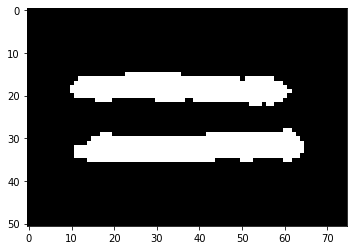

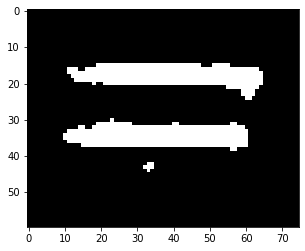

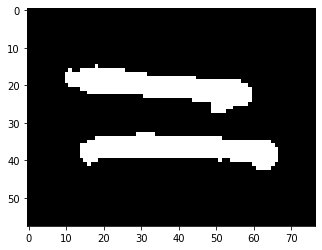

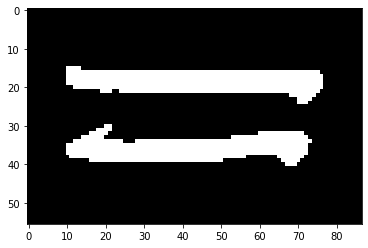

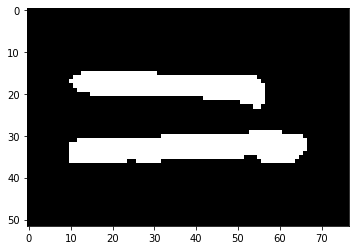

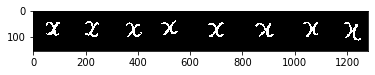

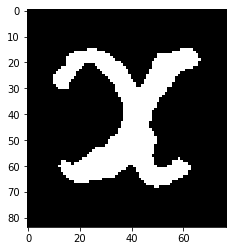

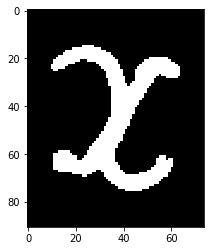

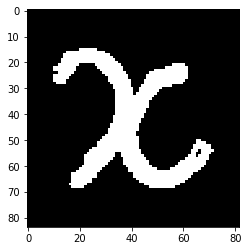

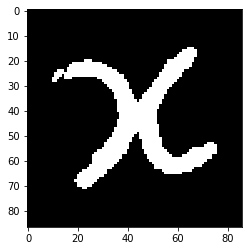

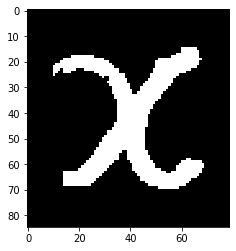

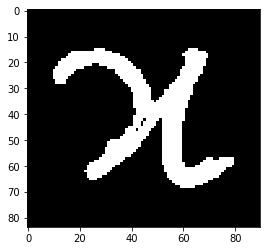

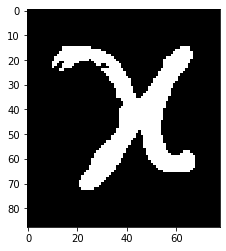

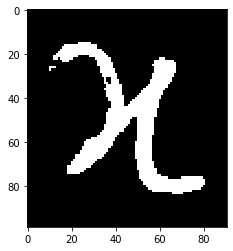

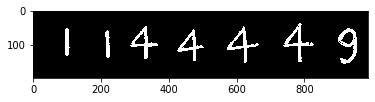

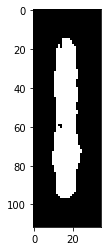

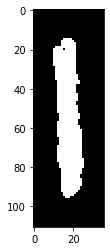

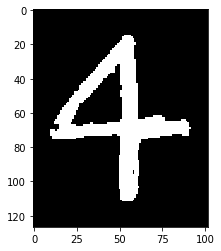

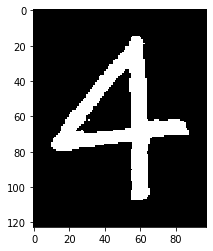

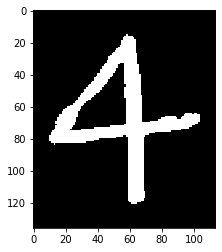

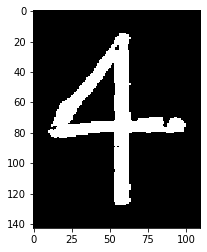

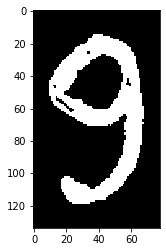

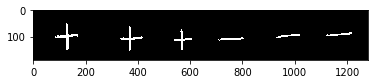

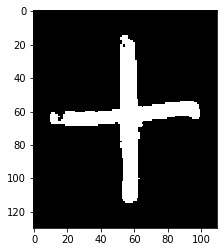

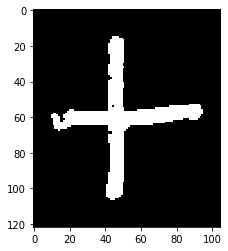

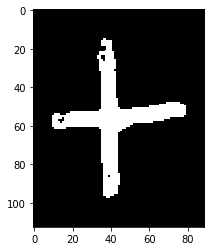

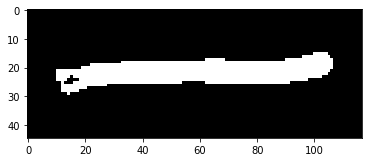

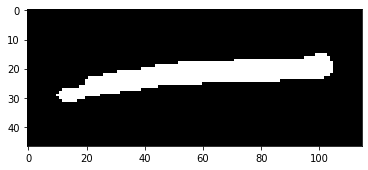

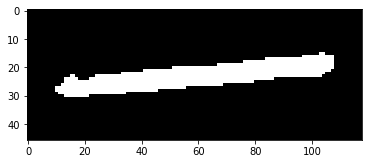

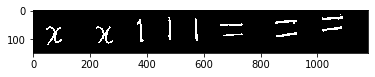

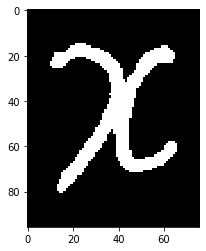

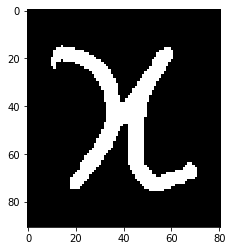

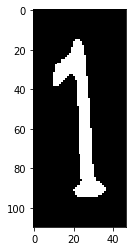

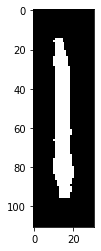

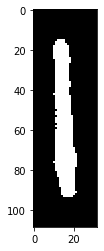

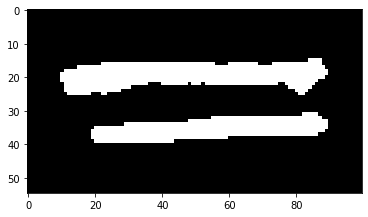

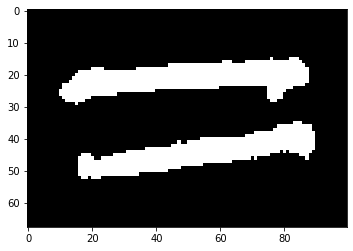

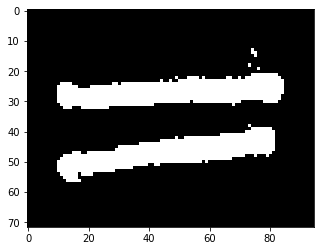

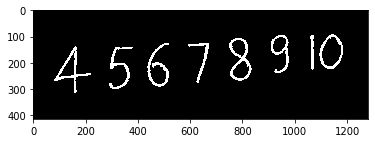

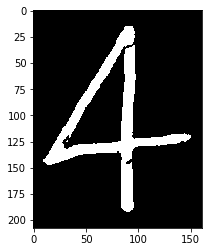

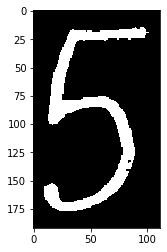

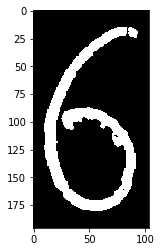

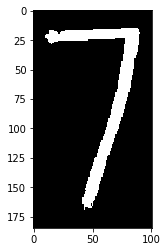

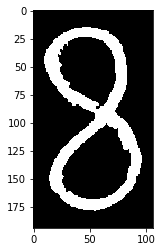

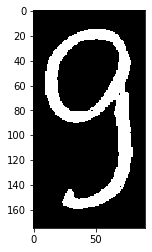

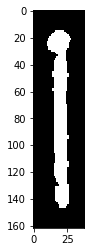

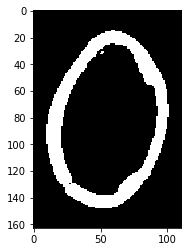

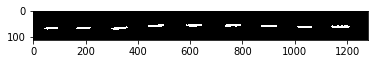

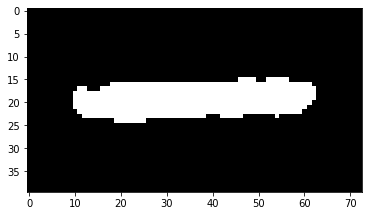

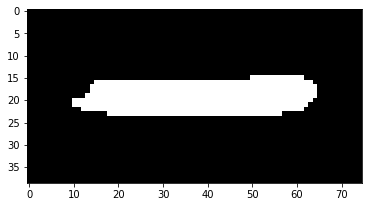

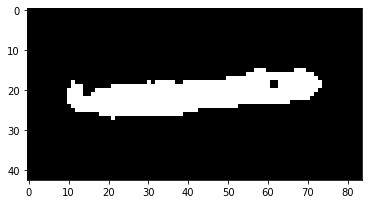

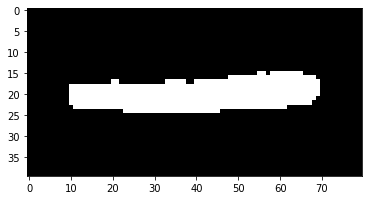

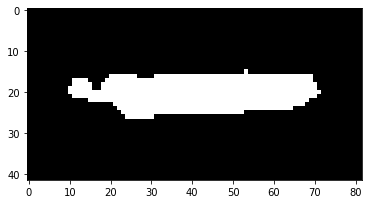

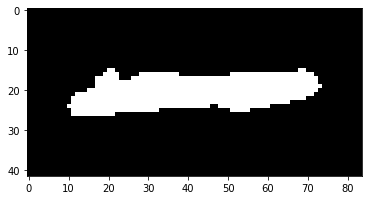

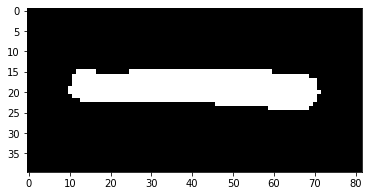

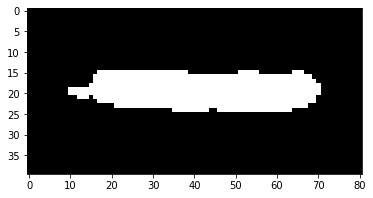

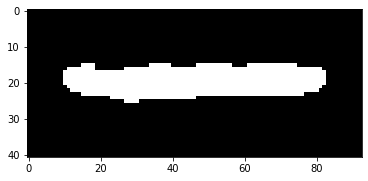

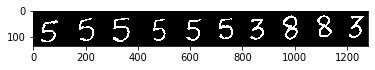

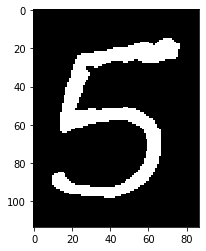

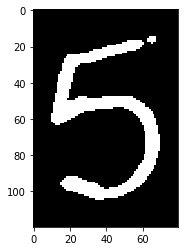

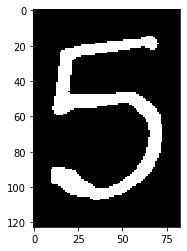

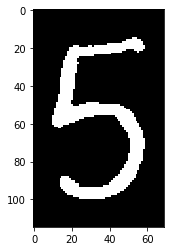

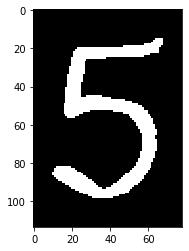

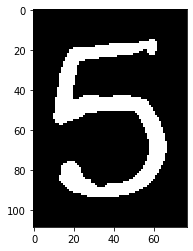

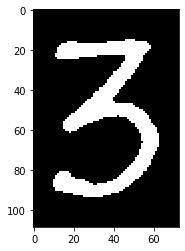

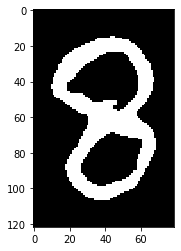

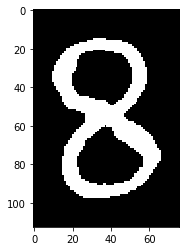

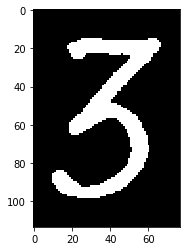

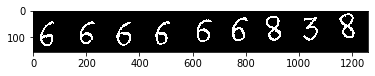

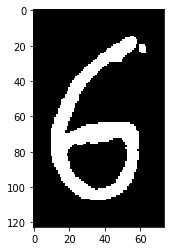

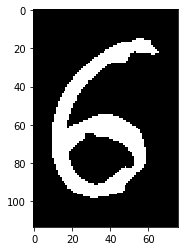

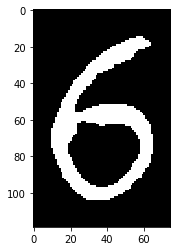

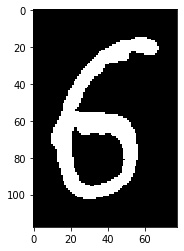

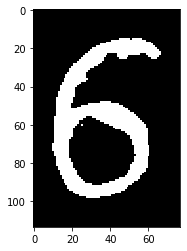

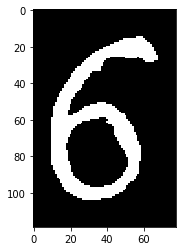

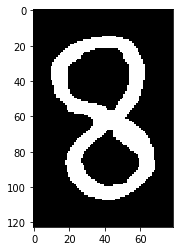

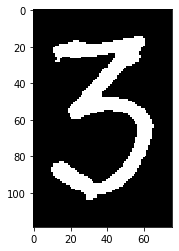

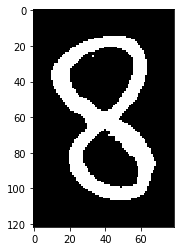

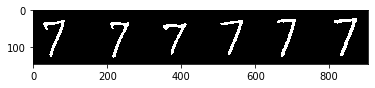

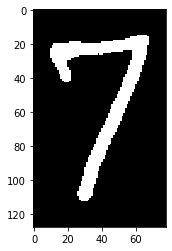

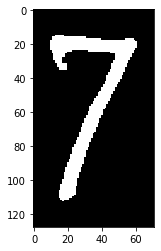

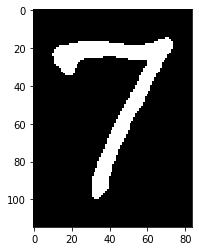

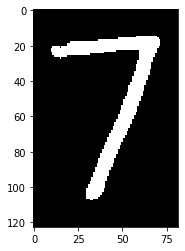

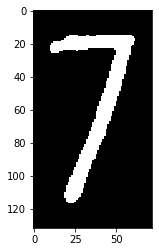

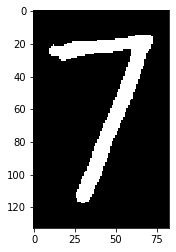

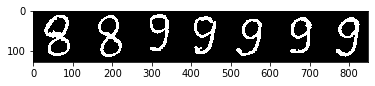

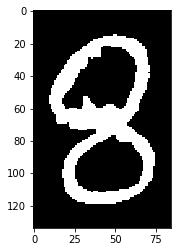

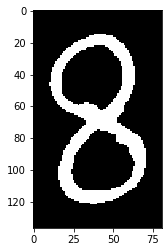

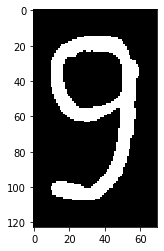

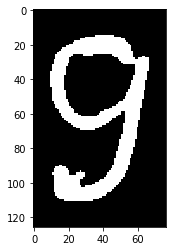

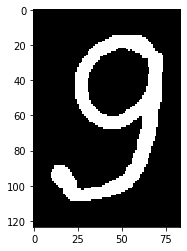

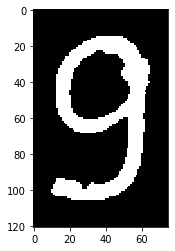

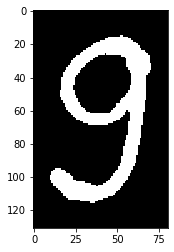

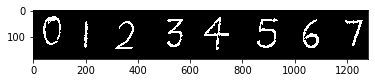

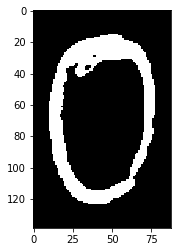

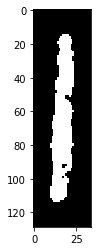

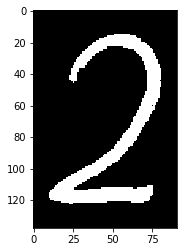

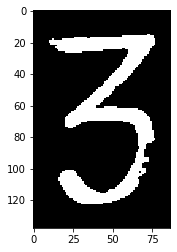

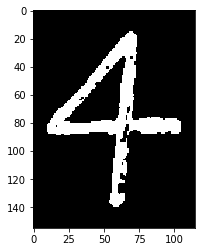

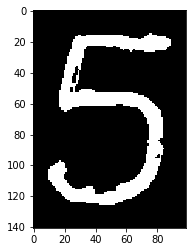

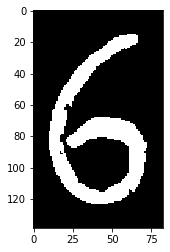

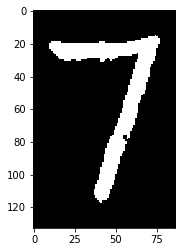

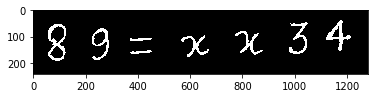

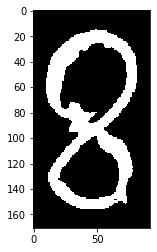

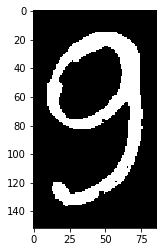

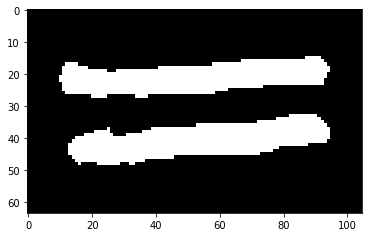

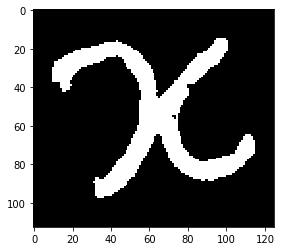

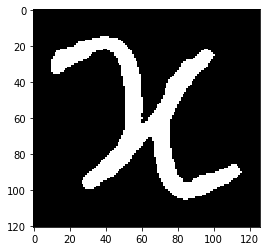

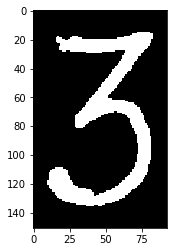

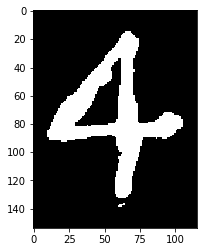

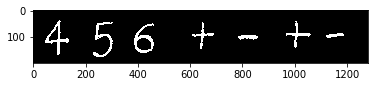

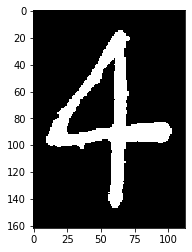

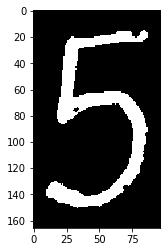

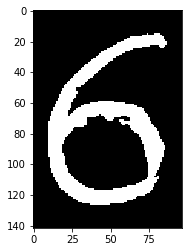

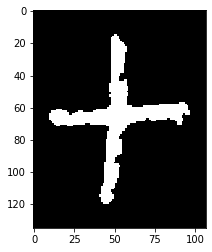

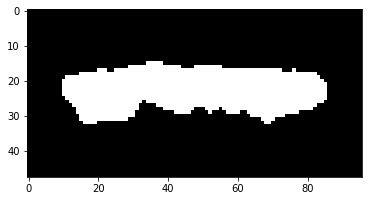

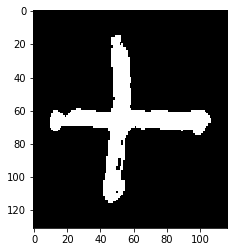

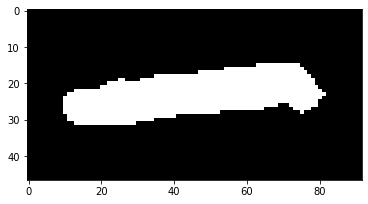

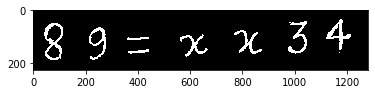

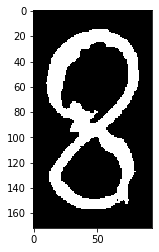

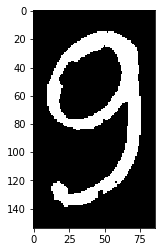

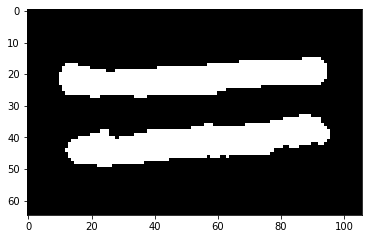

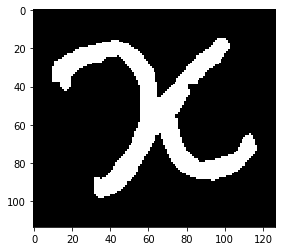

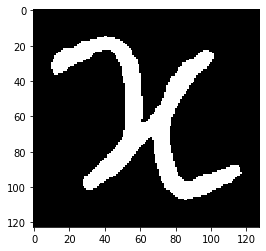

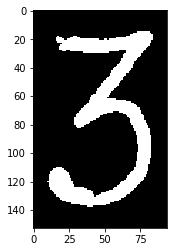

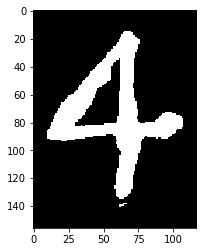

In [8]:
finallist=[]

#another list for no padding in the end
flistNoPad=[]
for images in trainImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    
    # convert to float
    pixel_values = np.float32(pixel_values)
    #K means with k=2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    
    #This for loop separates the segmented digits and operations
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    #this for loop remove border black pixels to center the digits       
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        #to not remove indices from middle(for ''='' case)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        flistNoPad.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        finallist.append(temp0)       

In [9]:
#training label
y_train=[0,0,0,0,0,0,0,0,8,8,8,3,4,9,2,13,13,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,1,1,4,4,4,4,9,10,10,10,11,11,11,13,13,1,1,1,12,12,12,4,5,6,7,8,9,1,0,11,11,11,11,11,11,11,11,11,5,5,5,5,5,5,3,8,8,3,6,6,6,6,6,6,8,3,8,7,7,7,7,7,7,8,8,9,9,9,9,9,0,1,2,3,4,5,6,7,8,9,12,13,13,3,4,4,5,6,10,11,10,11,8,9,12,13,13,3,4]        

In [10]:
len(finallist)

177

In [11]:
len(y_train)

177

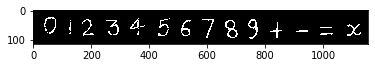

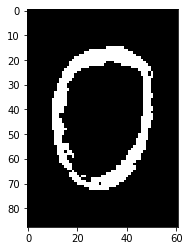

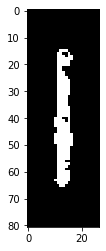

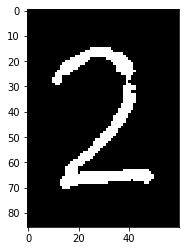

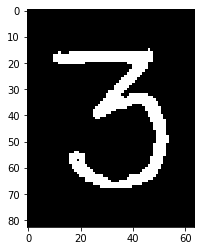

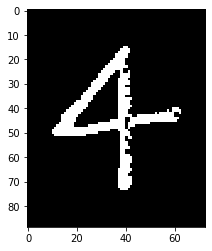

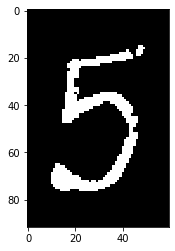

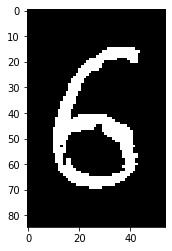

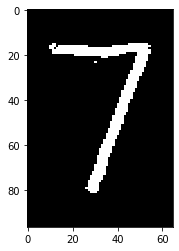

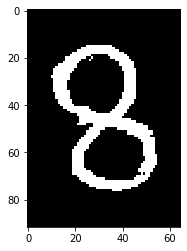

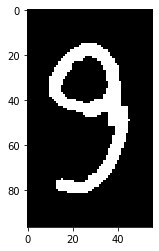

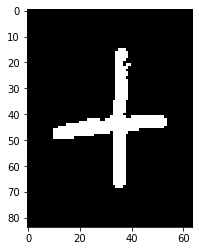

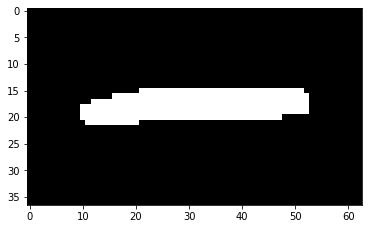

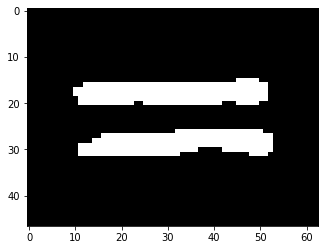

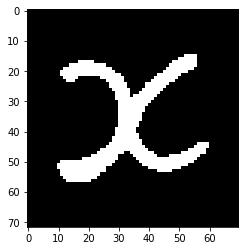

In [12]:
testlist=[]

#another data for no padding in the end
testnopadlist=[]
for images in testImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    #only R from RGB
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    #1269 since i+10 in loop
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        middle=len(var1)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        testnopadlist.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        testlist.append(temp0)
        

In [13]:
#test labels
y_test=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]

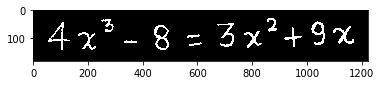

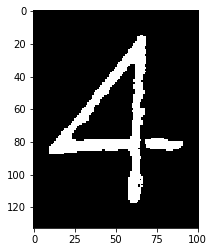

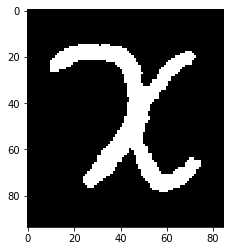

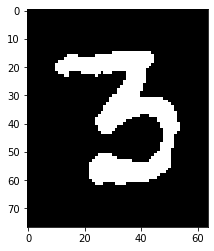

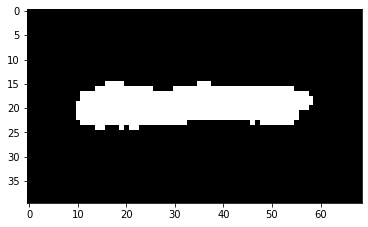

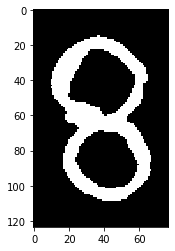

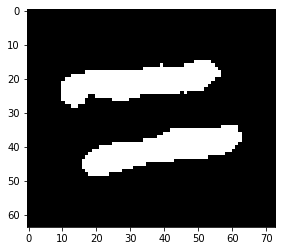

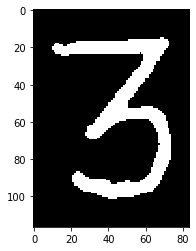

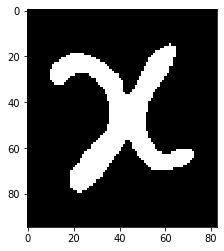

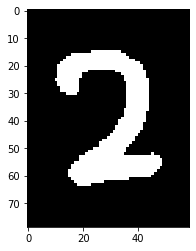

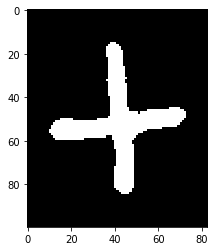

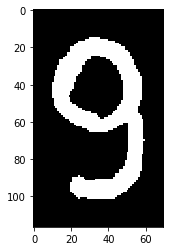

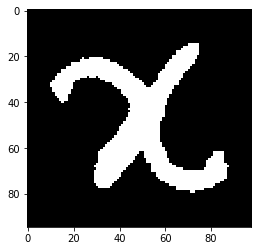

In [14]:
eqlist=[] #equation list

#another data for no padding in the end
eqnopadlist=[]
for images in eqImg:
    image = Image_read(images)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    plt.imshow(segmented_image)
    plt.show()
    img=segmented_image
    flag=0
    #only R from RGB
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    #1269 since i+10 in loop
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        middle=len(var1)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        eqnopadlist.append(temp0)
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        plt.imshow(temp0)
        plt.show()
        eqlist.append(temp0)
        

In [15]:
#equations label 
eq_test=[4,13,3,11,8,12,3,13,2,10,9,13]

In [16]:
leng=len(finallist)
nRows=np.array([k.shape[0] for k in finallist])
nCols=np.array([k.shape[1] for k in finallist])
flistNoPad=flistNoPad
leng2=len(flistNoPad)
nRows2=np.array([k.shape[0] for k in flistNoPad])
nCols2=np.array([k.shape[1] for k in flistNoPad])



## Resizing each image to increase speed and accuracy

In [17]:
#resizing
dsize = (80, 150)
dsizenopad=(64,64)
temp=finallist
temp2=flistNoPad
testtemp=testlist
testtemp2=testnopadlist
eqtemp=eqlist
eqtemp2=eqnopadlist

# resize image
for i in range(leng):
    temp[i] = cv2.resize(finallist[i], dsize)
for i in range(leng2):
    temp2[i] = cv2.resize(flistNoPad[i], dsizenopad)   
for i in range(len(testtemp)):
    testtemp[i] = cv2.resize(testlist[i], dsize)  
for i in range(len(testtemp2)):
    testtemp2[i] = cv2.resize(testnopadlist[i], dsizenopad) 
for i in range(len(eqtemp)):
    eqtemp[i] = cv2.resize(eqlist[i], dsize)  
for i in range(len(eqtemp2)):
    eqtemp2[i] = cv2.resize(eqnopadlist[i], dsizenopad) 

In [18]:
train=temp
test=testtemp
train2=temp2
test2=testtemp2
eq=eqtemp
eq2=eqtemp2

In [19]:
train2 = np.array(train2) 
test2 = np.array(test2) 

In [20]:
train2.shape

(177, 64, 64, 3)

## Converting the 1D list to a 2D array type to process data

In [21]:
# For training list

import tensorflow as tf
y_train_2D = tf.keras.utils.to_categorical(y_train ,num_classes=14)

In [22]:
y_train_2D.shape

(177, 14)

In [23]:
# For Testing list

y_test_2D = tf.keras.utils.to_categorical(y_test ,num_classes=14)

In [24]:
y_test_2D.shape

(14, 14)

In [25]:
test2.shape

(14, 64, 64, 3)

## Loading CNN Model

> Here, we load the CNN Model that we made in a separate python file (Poly_CNN.py) 

In [72]:
import warnings 
from tensorflow.keras.models import load_model 

# CNN Model 
model = load_model('./PolyEqSolver.h5')
warnings.filterwarnings("ignore")

### - Train the data (Fit the model)

In [62]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [73]:
hist = model.fit(
    train2, y_train_2D, 
    batch_size=64, 
    epochs = 30,
    shuffle = True,
    verbose = 1, 
    callbacks=[early_stop],
    validation_data=(test2, y_test_2D)
)

Epoch 1/30
3/3 [==============================] - 3s 387ms/step - loss: 7.5338 - accuracy: 0.1017 - val_loss: 1.8200 - val_accuracy: 0.4286
Epoch 2/30
3/3 [==============================] - 1s 194ms/step - loss: 2.8638 - accuracy: 0.2486 - val_loss: 1.5810 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 1s 205ms/step - loss: 1.9602 - accuracy: 0.3785 - val_loss: 1.3371 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 1s 184ms/step - loss: 1.3322 - accuracy: 0.5989 - val_loss: 1.1703 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 1s 213ms/step - loss: 1.1886 - accuracy: 0.6554 - val_loss: 0.9115 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 1s 208ms/step - loss: 0.8975 - accuracy: 0.7458 - val_loss: 0.6647 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 1s 255ms/step - loss: 0.6958 - accuracy: 0.8079 - val_loss: 0.4420 - val_accuracy: 0.9286
Epoch 8/30
3/3 [====

> ***The test data accuracy is*** **100 (val_accuracy: 1.0000)** ***and the training accuracy is*** **97.74% (accuracy: 0.9774)**.

> This indicates a good accuracy as the validation accuracy and accuracy are pretty close by

## Plotting Graphs to give a better clarity

### - Plot Cross Entropy Loss Graph

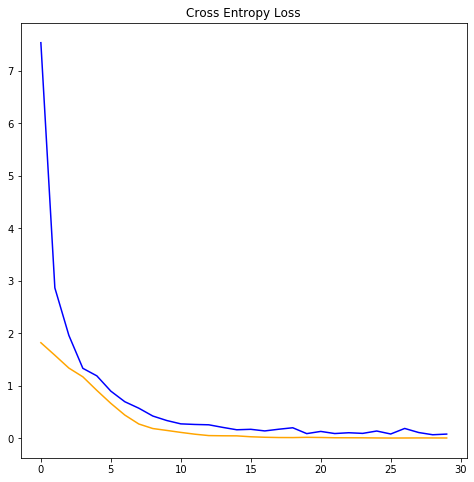

In [79]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))

# PLOT CROSS ENTROPY LOSS
plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')

### - Plot Clasification Accuracy Graph

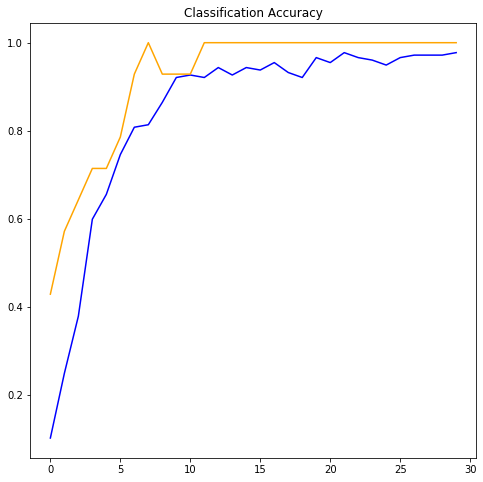

In [80]:
# PLOT CLASSIFICATION ACCURACY

plt.figure(figsize = (8,8))

plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')

### - Plot Confusion Matrix

In [31]:
# Convert the 2D array of x test data into 1d format such as 0,1,2, etc

y_pred = [] 

for pred in model.predict(test2): 
    y_pred.append(np.where(pred == max(pred))[0][0]) 

In [32]:
# Convert the 2D array of x train data into 1d format such as 0,1,2, etc

y_true = [] 

for data in y_test_2D: 
    y_true.append(np.where(data == max(data))[0][0])

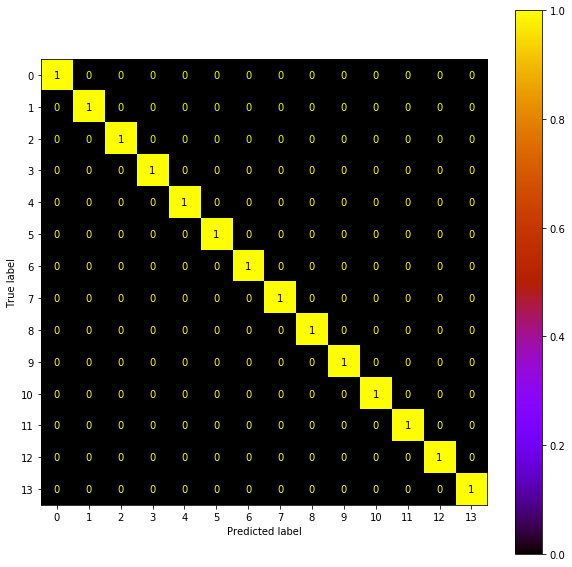

In [33]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

fig, ax = plt.subplots(figsize=(10, 10)) 

cm = confusion_matrix(y_true, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = 'gnuplot',ax = ax) 

plt.show()

## Prediction of images using CNN (Testing phase)

CNN Model Prediction:  9


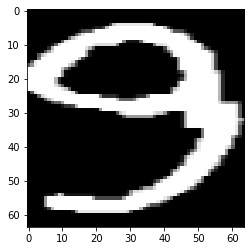

In [34]:
# Prediction with true value image

from numpy.random import randint 

rand_index = randint(0, len(y_pred)) 
plt.imshow(test2[rand_index])

if y_pred[rand_index] < 10:
    print('CNN Model Prediction: ', y_pred[rand_index])
     
else: 
    if y_pred[rand_index] == '10': 
        print('CNN Model Prediction: +') 
        
    if y_pred[rand_index] == '11': 
        print('CNN Model Prediction: -')
        
    if y_pred[rand_index] == '12': 
        print('CNN Model Prediction: =')
    
    if y_pred[rand_index] == '13': 
        print('CNN Model Prediction: X')

In [35]:
# Converting list to numpy array for prediction purposes 
eq2_cnn = np.array(eq2)

In [36]:
eq2_cnn.shape

(12, 64, 64, 3)

## Preparing Image data for Logistic Regression and SVM model

In [37]:
#Flattening the images array
newtrainlist=[k[:,:,0] for k in train]
newtestlist=[k[:,:,0] for k in test]
newtrainlist2=[k[:,:,0] for k in train2]
newtestlist2=[k[:,:,0] for k in test2]
neweqlist=[k[:,:,0] for k in eq]
neweqlist2=[k[:,:,0] for k in eq2]

In [38]:

newtrainlist=[k.flatten() for k in newtrainlist]
newtestlist=[k.flatten() for k in newtestlist]
newtrainlist2=[k.flatten() for k in newtrainlist2]
newtestlist2=[k.flatten() for k in newtestlist2]
neweqlist=[k.flatten() for k in neweqlist]
neweqlist2=[k.flatten() for k in neweqlist2]


In [39]:
x_train = np.vstack(newtrainlist)
print((x_train.shape))
x_test=np.vstack(newtestlist)
print((x_test.shape))

x_train2 = np.vstack(newtrainlist2)
x_test2=np.vstack(newtestlist2)
print((x_train2.shape))
print((x_test2.shape))
x_eq=np.vstack(neweqlist)
x_eq2=np.vstack(neweqlist2)

(177, 12000)
(14, 12000)
(177, 4096)
(14, 4096)


In [40]:
x_eq2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
#Over sampling (did not help much with acuracy)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [42]:
#Dividing the pixel values by 255 to get only 0 and 1 values in the input arrays 
def fn(x):
    if(x==0):
        return 0
    else :
        return 1
fn=np.vectorize(fn)    
x_train3=fn(x_train)
x_train4=fn(x_train2)
x_test3=fn(x_test)
x_test4=fn(x_test2)
x_eq3=fn(x_eq)
x_eq4=fn(x_eq2)

In [43]:
#equation image correct labels
print(eq_test)

[4, 13, 3, 11, 8, 12, 3, 13, 2, 10, 9, 13]


## Comparing Logistic Regression, SVM and Decision Tree for Accuracy

### - Logistic Regression model 

In [44]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'multinomial',random_state=1)
lr.fit(x_train2, y_train)

LogisticRegression(multi_class='multinomial', random_state=1)

In [45]:
# Testing and Training accuracy using Logistic Regression
print(lr.score(x_test2,y_test))
print(lr.score(x_eq2,eq_test))

1.0
0.9166666666666666


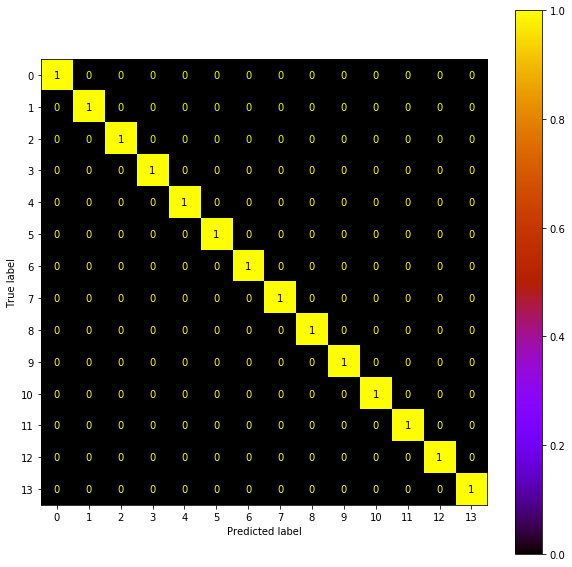

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))


y_pred = lr.predict(x_test2)

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = 'gnuplot',ax = ax) 

plt.show()

### - SVM Model

In [47]:
#SVM model
from sklearn import svm
svmf = svm.SVC(decision_function_shape='ovo')
svmf.fit(x_train2, y_train)

SVC(decision_function_shape='ovo')

In [48]:
# Testing and Traning
print(svmf.score(x_test2,y_test))
print(svmf.score(x_eq2,eq_test))

0.9285714285714286
1.0


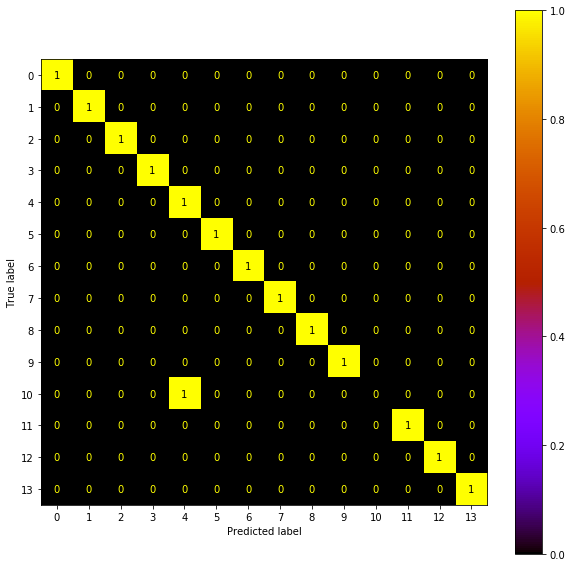

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))


y_pred = svmf.predict(x_test2)

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = 'gnuplot',ax = ax) 

plt.show()

### - Decision Tree

In [50]:
#Decision tree model
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=10)
dt= dt.fit(x_train2, y_train)

In [51]:
print(dt.score(x_test2,y_test))
print(dt.score(x_eq2,eq_test))

0.7142857142857143
0.75


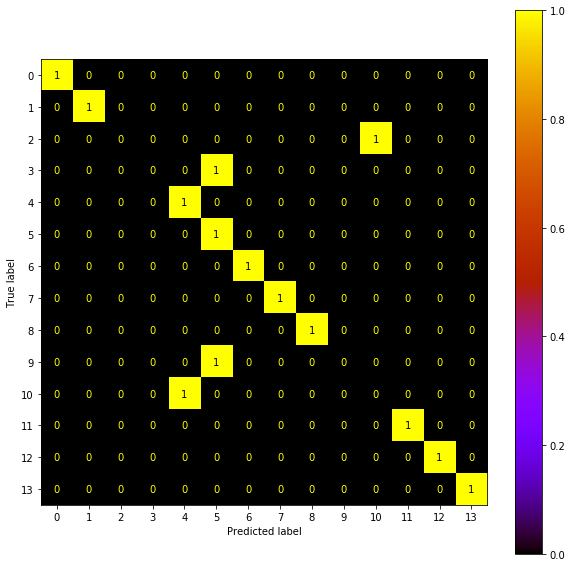

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))


y_pred = dt.predict(x_test2)

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = 'gnuplot',ax = ax) 

plt.show()

### Comparing Different Models

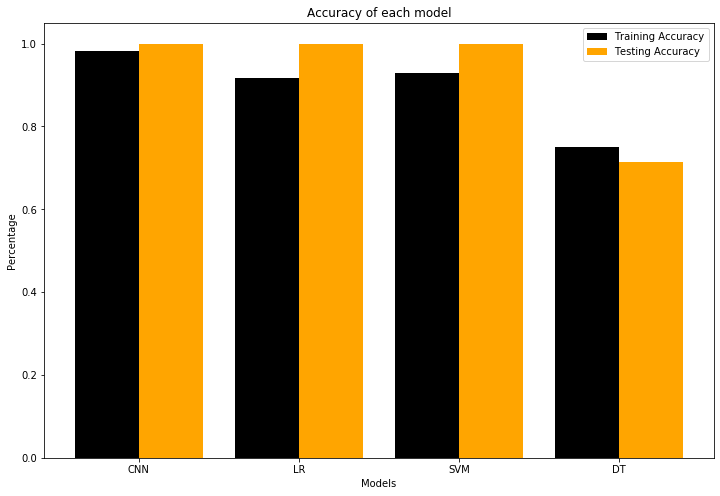

In [53]:
# Bar Plot 

plt.figure(figsize=(12,8)) 

X = ['CNN','LR','SVM','DT']
train_acc = [0.9831, 0.9166, 0.9285, 0.7500] 
test_acc = [1.0000, 1.0000, 1.0000, 0.7143] 

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train_acc, 0.4, label = 'Training Accuracy', color = 'black') 
plt.bar(X_axis + 0.2, test_acc , 0.4, label = 'Testing Accuracy', color = 'orange')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Accuracy of each model")
plt.legend()
plt.show()

> **Here we find that CNN Model gives the best accuracy in comparsion with SVM, logistic regression and decision tree and hence use this for solving a handwritten polynomial equation**

## Polynomial Equation Solver

#### Importing Custom-made library for solving the equations

In [54]:
import PolyEquations as poly

In [55]:
def get_pred(model, x):     
    '''
    Function used to output the predicted numerical label from a 2D array. 
    
    model -> Your ML model 
    x -> The data you want to predict on 
    
    '''
    
    y_pred = [] 

    for pred in model.predict(x): 
        y_pred.append(np.where(pred == max(pred))[0][0]) 
    
    return y_pred 

### Solving Equation Using CNN Model

In [74]:
# CNN Prediction Labels
cnn_preds = np.array(get_pred(model, eq2_cnn))
cnn_preds

array([ 4, 13,  3, 11,  8, 12,  3, 13,  2, 10,  9, 13], dtype=int64)

In [75]:
#Final Output 
poly.polyEqSolver(list(cnn_preds))

4 x^3 - 8 = 3 x^2 + 9 x 
 ------------------------------

Old x: [4, 13, 3, 11, 8, 12, 3, 13, 2, 10, 9, 13]
New x:  [4, 13, 3, 11, 8, 3, 13, 2, 10, 9, 13]

Degree of Polynomial :  3

 ------------------------------

New x (with sign changes):  [4, 13, 3, 11, -8, -3, 13, 2, 10, -9, 13]

 ------------------------------

Index of Coefficient:  0
Coefficient:  4
Degree:  3

Index of Coefficient:  5
Coefficient:  -3
Degree:  2

Index of Coefficient:  9
Coefficient:  -9
Degree:  1

------------------------------

Constant:  -8
Coeffs of Equation:  [-9, -3, 4]
------------------------------

Roots of equations are :


array([ 2.19238137+0.j        , -0.72119068+0.62620607j,
       -0.72119068-0.62620607j])